In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom, beta
from scipy.integrate import quad
import seaborn as sns
%matplotlib inline

## Sampling Lab

Let A, and B be two random variables that are normally distributed with mean 0 and precision 1.

**Exercise 1:**

Plot the distribution of the following random variables

1. $X_1 = sin(A) + B^2$
2. $X_2 = log(A^2) + B*A$
3. $X_3 = sin(A+B)$
4. $X_4 = cos(A) + sin(B)^2$

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


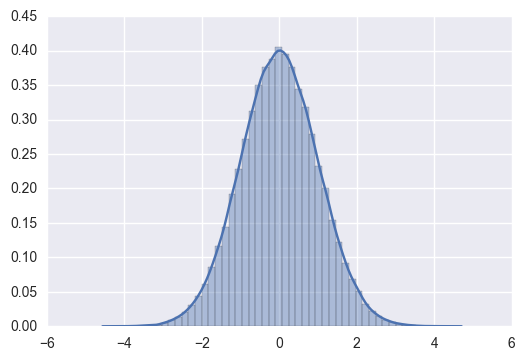

In [2]:
samplesize = 100000.0
A = np.random.normal(0,1,size=(samplesize,))
B = np.random.normal(0,1,size=(samplesize,))

sns.distplot(A);

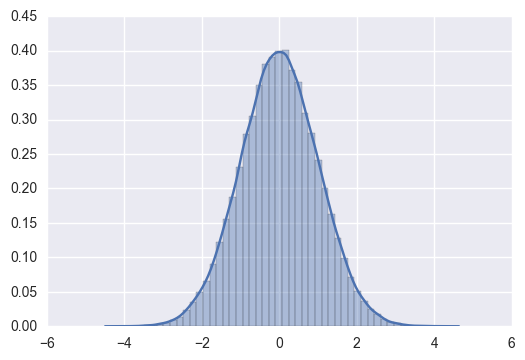

In [3]:
sns.distplot(B);

In [4]:
X1 = lambda a,b: (np.sin(a) + b**2)
X2 = lambda a,b: (np.log(a**2)+(b*a))
X3 = lambda a,b: (np.sin(a+b))
X4 = lambda a,b: (np.cos(a) + np.sin(b)**2)

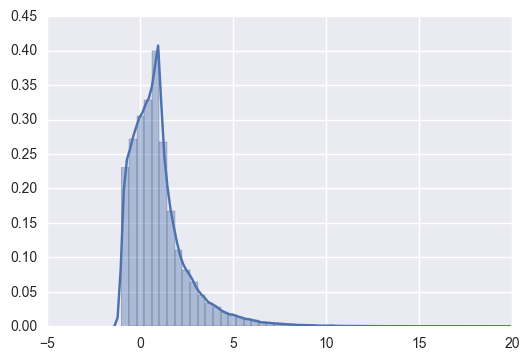

In [5]:
sns.distplot(X1(A,B))

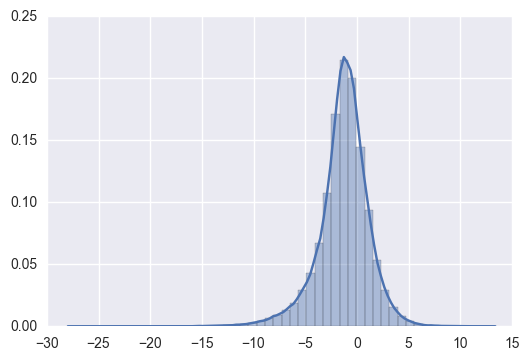

In [6]:
sns.distplot(X2(A,B))

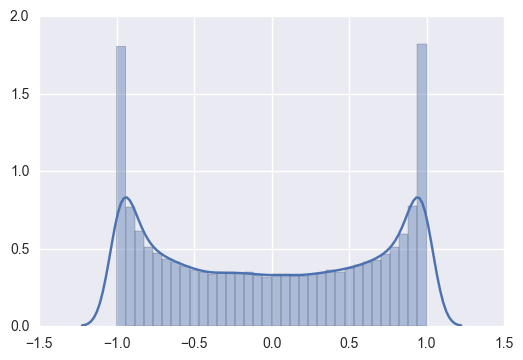

In [7]:
sns.distplot(X3(A,B))

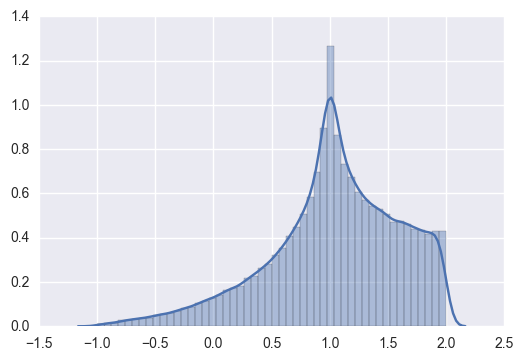

In [8]:
sns.distplot(X4(A,B))

**Exercise 2:**

Calculate the following expressions:

1. $P(X_1>0) = E[\mathbb{1}_{X_1 > 0}]$
2. $P(X_2 > E[X_2]) = E[\mathbb{1}_{X_2 > E[X_2]}]$
3. $E[cos(X_3)]$
4. $E[X_4]$ and $Var[X_4]$ 

In [9]:
def I(bool_func):
    return lambda x: 1 if bool_func(x) else 0
AB = zip(A,B)
def E1(func, samples):
    N = len(samples)
    return 100./N*(len([func(e[0],e[1]) for e in samples if func(e[0],e[1])>0]))

E1(X1,AB)


#Q1 = len([X1(e[0],e[1]) for e in AB if X1(e[0],e[1]) > 0])
#float(Q1)/samplesize * 100

73.991

In [10]:
def E2(func, samples):
    N = len(samples)
    weighted_avg = np.sum([func(e[0],e[1]) for e in samples])
    return 100./N*(len([func(e[0],e[1]) for e in samples if func(e[0],e[1])>(1./N*(weighted_avg))]))

E2(X2,AB)

53.643

In [11]:
def E3(func, samples):
    N = len(samples)
    return 1./N*sum([func(e) for e in samples])

E3(np.cos,X3(A,B))

0.76888406628136052

In [12]:
def E4(func, samples):
    N = len(samples)
    return 1./N*sum([func(e[0],e[1]) for e in samples])

EX4 = E4(X4,AB)
VAR4 = np.sum([X4(e[0],e[1])**2 for e in AB])/len(AB)-EX4**2

print EX4,VAR4



1.04005461173 0.319784287928


**Exercise 3:**

Let's define the following random variable

$$X_t = e^{-t|A|} + cos(Bt)$$

For each sample $(a,b)$ of $A,B$ we get a function $f(t) = X_t(a,b) = e^{-t|a|} + cos(bt)$.

1. Sample (randomly!) 5 functions from the random variable $X_t$ and plot them in one graph
2. Create a Python expression for the regression line defined by $t \to E[X_t]$.
3. Plot the regression line
4. Explain the shape of the regression line

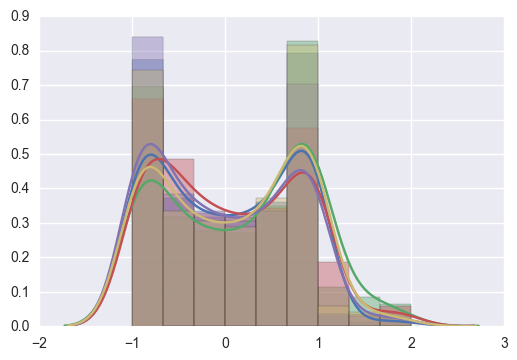

In [13]:
Et = lambda a,b: lambda t: np.exp(-t*np.abs(a)) + np.cos(b*t)
np.exp((-1)*t*np.abs(s[0])) + np.cos(s[1]*t))
T = np.arange(0,50,.1)

Ar = A[np.random.randint(low=0,high=samplesize-1,size=5)]
Br = B[np.random.randint(low=0,high=samplesize-1,size=5)]

for i in range(5):
    sns.distplot(Et(Ar[i],Br[i])(T))

In [14]:
# Expectation Value by Monte Carlo
def E(func, samples):
    N = len(samples)
    return 1./N*sum([func(e) for e in samples])

Reg = lambda t: E(lambda d: np.exp(-t*np.abs(d[0])) + np.cos(d[1]*t), AB)


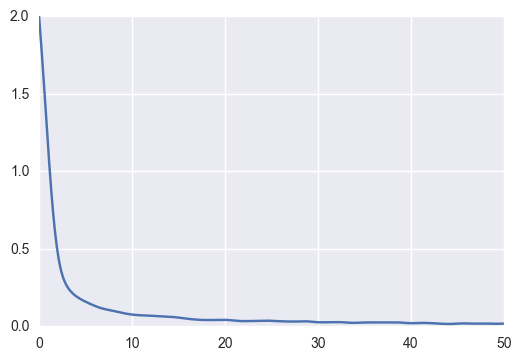

In [16]:
plt.plot(T,Reg(T))